In [28]:
import skimage.io  # scikit-image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IsingGrid import IsingGrid
from time import perf_counter

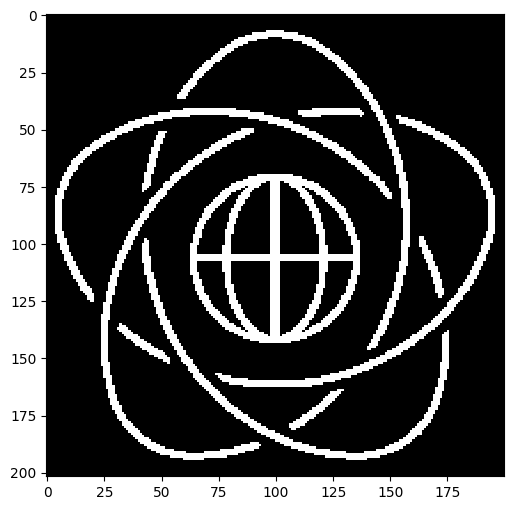

In [2]:
image = skimage.io.imread("img/mini_logo.png")
image = (image[:, :, 0].astype(np.int32) * 2) - 1
fig, axes = plt.subplots(figsize=(10, 6))
axes.imshow(image, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

# creating random image

### small inv temp = 0.1

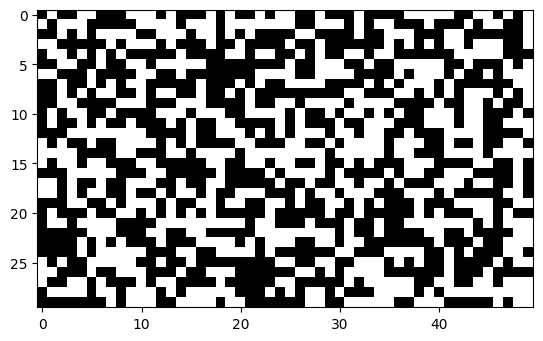

In [20]:
gg = IsingGrid(30, 50, 0, 0.1)
gg.make_random()
gg.plot()

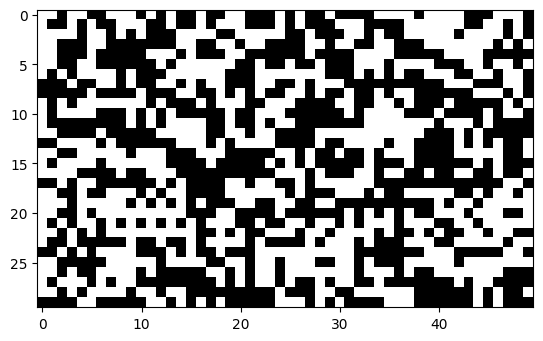

In [21]:
for _ in range(10000):
    gg.gibbs_move()
gg.plot()

### big inv temp = 2

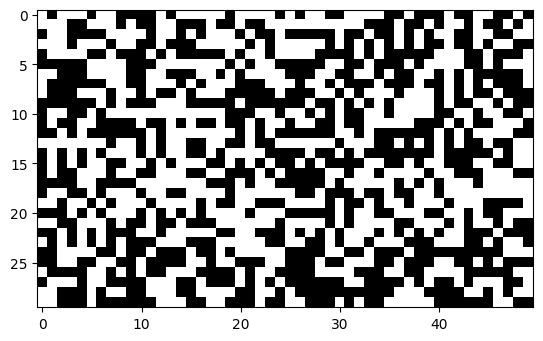

In [26]:
gg = IsingGrid(30, 50, 0, 2)
gg.make_random()
gg.plot()

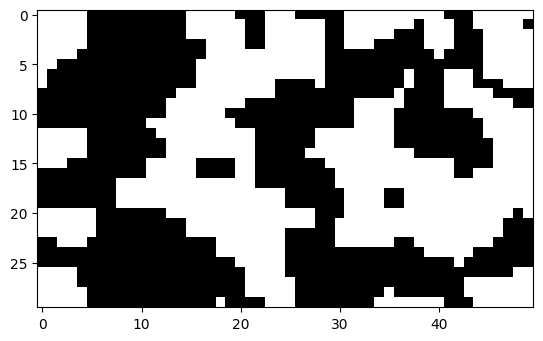

In [27]:
for _ in range(10000):
    gg.gibbs_move()
gg.plot()

### time measuring

Text(0.5, 1.0, 'Time required to run 10000 Gibbs moves')

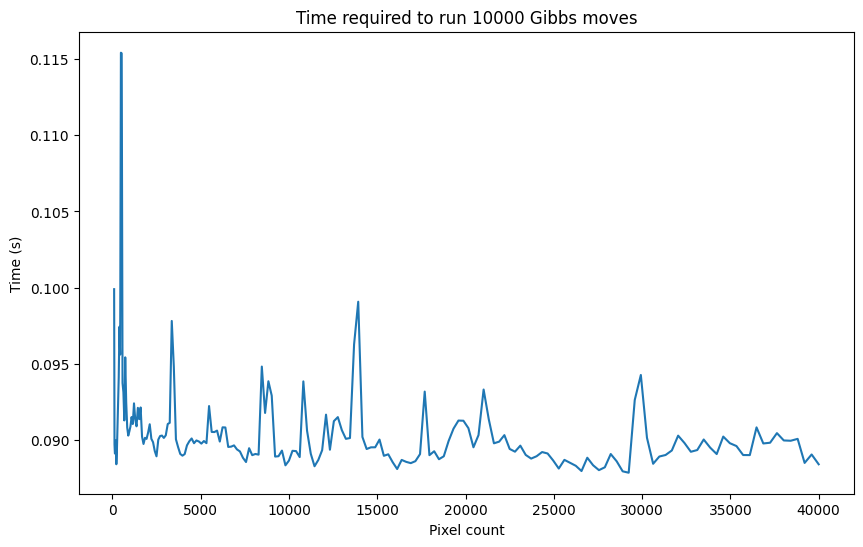

In [37]:
times = []
sizes = []

for size in range(10, 201, 1):
    gg = IsingGrid(size, size, 0, 2)
    gg.make_random()
    start = perf_counter()
    for _ in range(10000):
        gg.gibbs_move()
    times.append(perf_counter() - start)
    sizes.append(size**2)

fig, axes = plt.subplots(figsize=(10, 6))
axes.plot(sizes, times)
axes.set_xlabel("Pixel count")
axes.set_ylabel("Time (s)")
axes.set_title("Time required to run 10000 Gibbs moves")

Text(0.5, 1.0, 'Time required to run 10000 Gibbs moves on 50x50 grid')

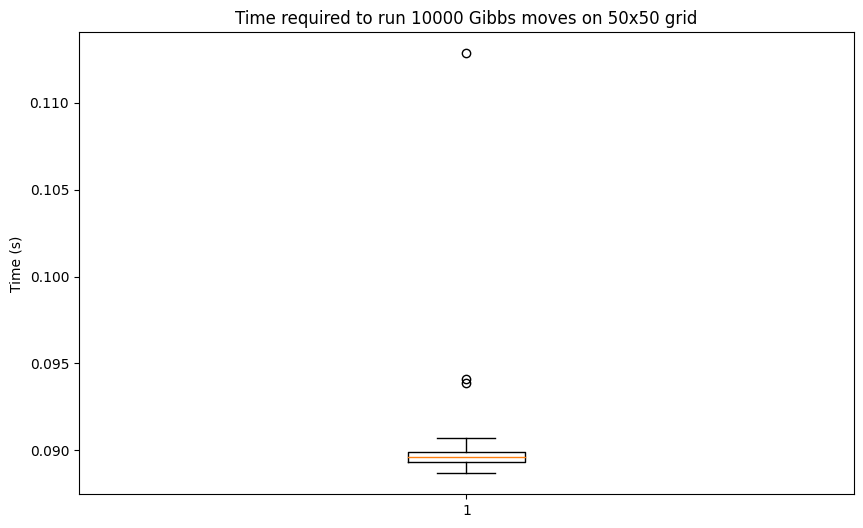

In [42]:
times = []
sizes = []

for _ in range(50):
    gg = IsingGrid(50, 50, 0, 2)
    gg.make_random()
    start = perf_counter()
    for _ in range(10000):
        gg.gibbs_move()
    times.append(perf_counter() - start)

# create boxplot of times
fig, axes = plt.subplots(figsize=(10, 6))
axes.boxplot(times)
axes.set_ylabel("Time (s)")
axes.set_title("Time required to run 10000 Gibbs moves on 50x50 grid")